# Intro Python - Data Analysis & Visualizations

## Exploratory Data Analysis

In [2]:
# Import all of the important packages
import numpy as np
import math
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd

# import data set
flower_data = pd.read_csv("IRIS.csv")
flower_data.head(5)

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

### Boxplot
Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups.


Following bar plots show distributions of the sepal length of the species.

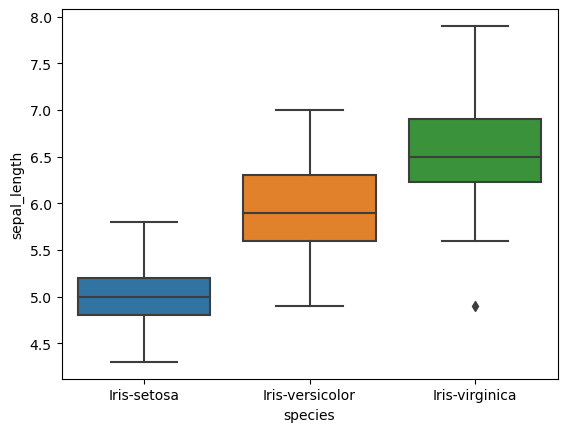

In [4]:
import seaborn as sns

sns.boxplot(x = flower_data["species"], 
            y = flower_data["sepal_length"]);

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

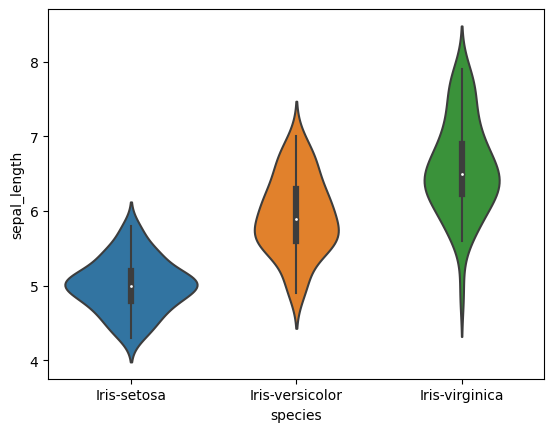

In [5]:
sns.violinplot(x = flower_data["species"], 
            y = flower_data["sepal_length"])

### Pie Plot
Pie Plots have a general sense of the part-to-whole relationship in your data and comparing the precise sizes of the slices

Following Pie Plot shows relative population sizes.

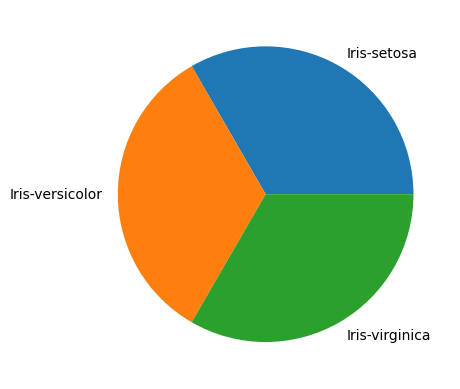

In [9]:
import matplotlib.pyplot as plt

species = flower_data[["species"]]

# count the number of each species
values = species.value_counts()

# label of each species
labels = np.unique(species)

plt.pie(values, labels = labels);

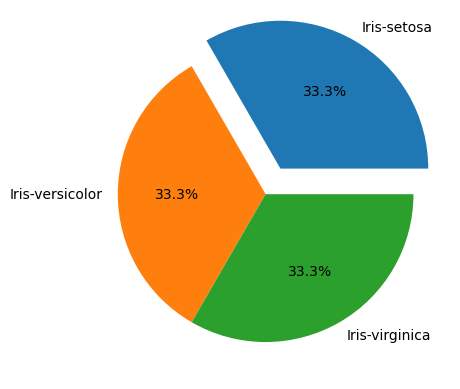

In [7]:
# make the pie chart extend outward
explode = [0.2, 0, 0]

plt.pie(values, labels = labels, explode = explode, autopct='%.1f%%');

### Scatterplot
Scatter plots are used to plot data points on a horizontal and a vertical axis in the attempt to show how much one variable is affected by another

The following scatterplot compares sepal width to sepal length

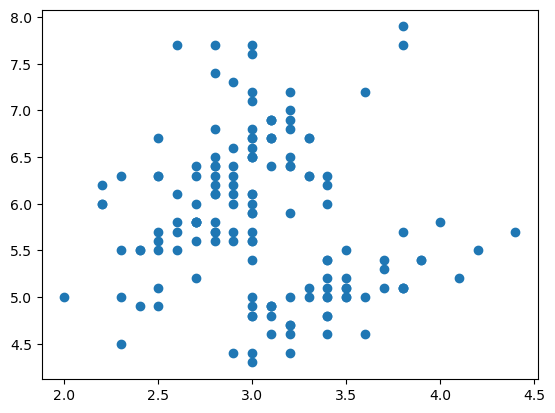

In [10]:
import matplotlib.pyplot as plt

plt.scatter(x = flower_data["sepal_width"],
            y = flower_data["sepal_length"]);

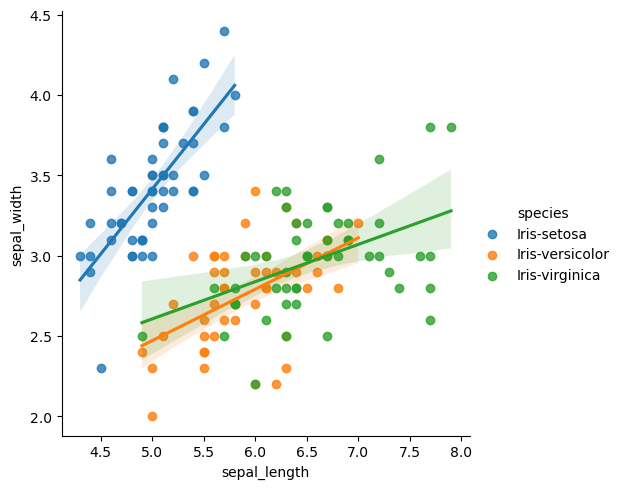

In [17]:
sns.lmplot( x="sepal_length", y="sepal_width", data=flower_data, fit_reg=True, hue='species', legend=True)

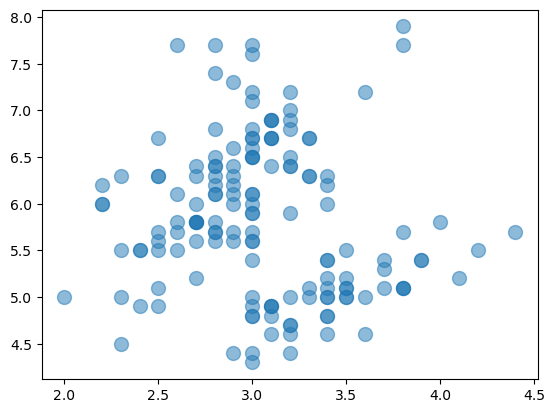

In [16]:
plt.scatter(x = flower_data["sepal_width"],
            y = flower_data["sepal_length"],
           alpha = 0.5, s=100);

### Bar Plot
A barplot is used to display the relationship between a numeric and a categorical variable

This bar plot displays the average sepal lengths of the different species 

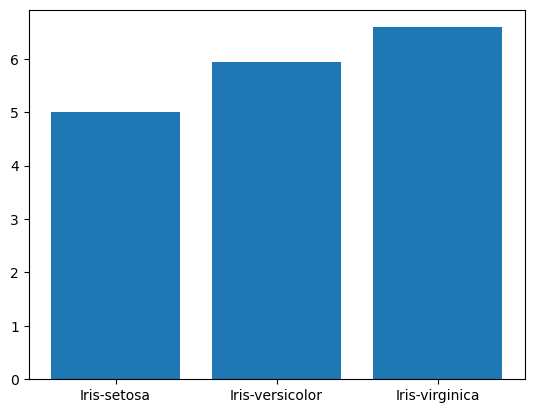

In [10]:
import matplotlib.pyplot as plt

labels = np.unique(species)
mean_val = np.array([])
for i in np.unique(species):
    one_flower = flower_data[flower_data["species"] == i]
    val = one_flower[["sepal_length"]].mean()
    mean_val = np.append(mean_val, [val])

plt.bar(labels, mean_val);

<ErrorbarContainer object of 3 artists>

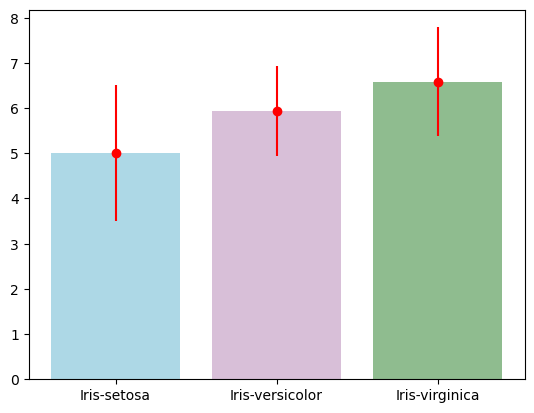

In [19]:
# Graph of error lines
plt.bar(labels, mean_val, color=["lightblue", "thistle", "darkseagreen"]);
plt.errorbar(labels, mean_val, yerr=[1.5, 1, 1.2], fmt="o", color="r")

### Histogram 
The histogram is used to summarize discrete or continuous data that are measured on an interval scale

The following bar plot displays the distribution of sepal length for all flowers.

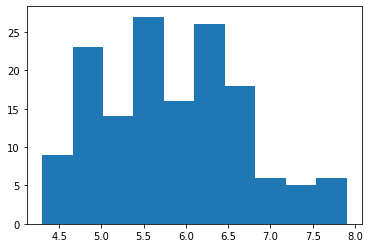

In [7]:
import matplotlib.pyplot as plt

plt.hist(flower_data[["sepal_length"]]);

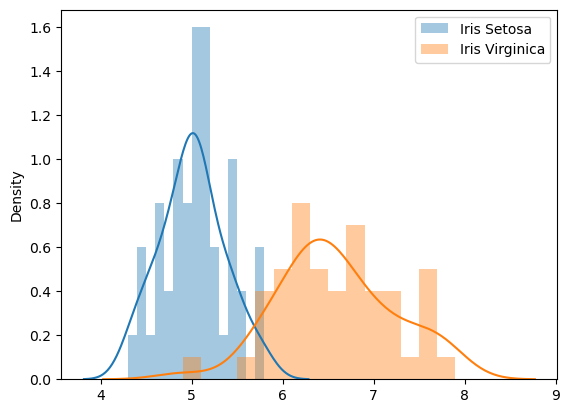

In [40]:
sns.distplot(flower_data.head(50)[["sepal_length"]], bins=15, label="Iris Setosa")
sns.distplot(flower_data.tail(50)[["sepal_length"]], bins=15, label="Iris Virginica")
plt.legend()

### Line Graph 
Shows progression over a continuous variable  

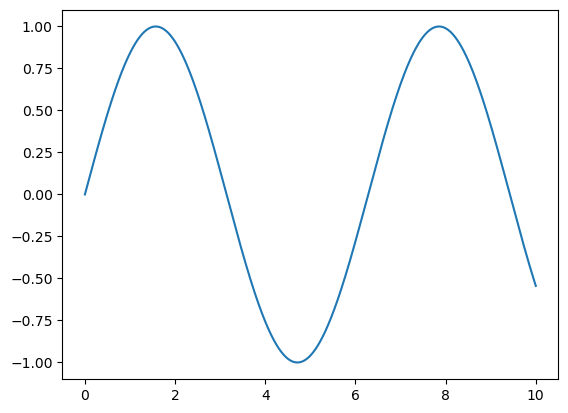

In [5]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x));
plt.show()

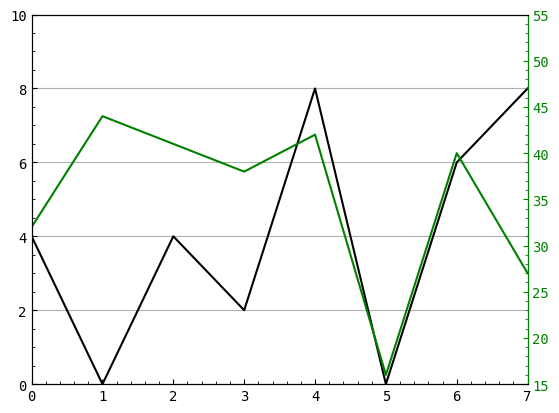

In [4]:
# Get figure, axis and additional axes
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# Set axes limits
ax1.set_xlim(0, 7)
ax1.set_ylim(0, 10)
ax2.set_ylim(15, 55)

# Add some random example lines
line1, = ax1.plot(np.random.randint(*ax1.get_ylim(), 8), color="black")
line2, = ax2.plot(np.random.randint(*ax2.get_ylim(), 8), color="green")

# Set axes colors
ax1.spines["left"].set_color(line1.get_color())
ax2.spines["right"].set_color(line2.get_color())

# Set up ticks and grid lines
ax1.minorticks_on()
ax2.minorticks_on()
ax1.tick_params(direction="in", which="both", colors=line1.get_color())
ax2.tick_params(direction="in", which="both", colors=line2.get_color())
ax1.grid(axis='y', which='major')

plt.show()

## Interesting Graphs

In [41]:
import pandas as pd

# import data
bank_data = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
bank_data = bank_data[["Education", "Family","Income"]]
bank_data.head(5)

Education  Family  Income
0          1       4      49
1          1       3      34
2          1       1      11
3          2       1     100
4          2       4      45

### Facet Graphs
FacetGrid class helps in visualizing distribution of one variable as well as the relationship between multiple variables separately within subsets of your dataset using multiple panels.

The following will show the difference for income when comparing education level and number of members in direct family.

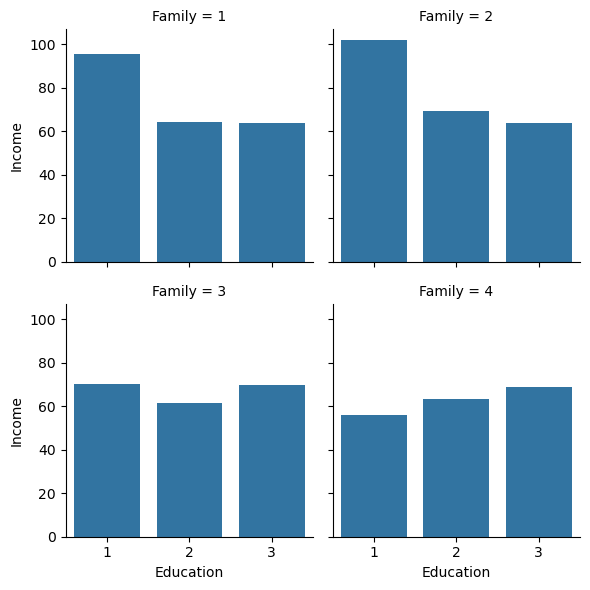

In [42]:
import seaborn as sns

bank_data = bank_data[["Education", "Family","Income"]]

group_by_data = bank_data.groupby(["Education", "Family"])[["Income"]].mean().reset_index()

g = sns.FacetGrid(group_by_data, col = "Family", col_wrap=2)
g.map(sns.barplot, "Education", "Income");

### Side by Side Bar Graphs
side-by-side column graph can be used to organise and display the data that arises when a group of individuals or things are categorised according to two or more criteria.

The following will show the difference for income when comparing education level and number of members in direct family.

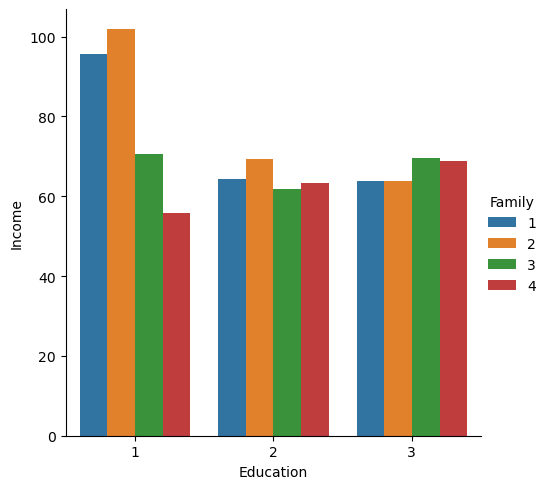

In [43]:
import seaborn as sns

group_by_data = bank_data.groupby(["Education", "Family"])[["Income"]].mean().reset_index()
sns.factorplot(x = 'Education', y='Income', 
               hue = 'Family',data=group_by_data, kind='bar');

### Correlation Heat Map
Correlation heatmaps can be used to find potential relationships between variables and to understand the strength of these relationships

The following will show if there is a correlation between sepal width/length and petal width/length.

<AxesSubplot:>

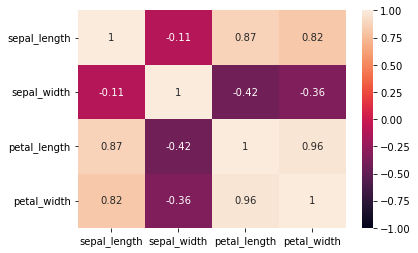

In [8]:
import seaborn as sns

only_numbers = flower_data[['sepal_length','sepal_width','petal_length','petal_width']]
sns.heatmap(only_numbers.corr(), vmin = -1, vmax = 1, annot = True)

### Heat Map of US
The primary purpose of Heat Maps is to better visualize the volume of locations/events within a dataset and assist in directing viewers towards areas on data visualizations that matter most

https://towardsdatascience.com/simplest-way-of-creating-a-choropleth-map-by-u-s-states-in-python-f359ada7735e

In [61]:
# Import function / new data
import plotly.express as px

state_data = pd.read_csv("state_market_tracker.tsv000.gz", sep='\t')
state_data = state_data[['period_begin','state','state_code','property_type','median_sale_price']]
state_data.head(5)

period_begin          state state_code              property_type  \
0   2018-01-01      Louisiana         LA                Condo/Co-op   
1   2018-02-01       Colorado         CO    Multi-Family (2-4 Unit)   
2   2020-06-01  Massachusetts         MA  Single Family Residential   
3   2018-02-01    Mississippi         MS  Single Family Residential   
4   2019-04-01        Florida         FL    Multi-Family (2-4 Unit)   

   median_sale_price  
0             192900  
1             560100  
2             464200  
3             173600  
4             269900

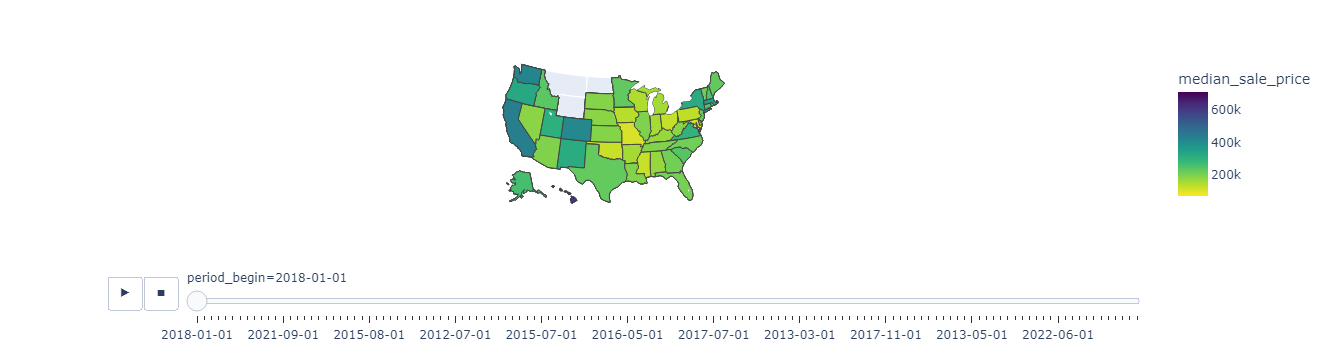

In [62]:
import plotly.express as px

fig = px.choropleth(state_data,
    locations='state_code', 
    locationmode="USA-states", 
    color='median_sale_price',
    color_continuous_scale="Viridis_r", 
    scope="usa",
    animation_frame='period_begin') 
    #make sure 'period_begin' is string type and sorted in ascending order

fig.show()

### Word Cloud
Word Clouds display the most prominent or frequent words in a body of text

In [48]:
# Import functions & new data
from wordcloud import WordCloud, STOPWORDS
word_data = pd.read_csv(r"Youtube04-Eminem.csv")
word_data.head(5)

COMMENT_ID         AUTHOR  \
0    z12rwfnyyrbsefonb232i5ehdxzkjzjs2    Lisa Wellas   
1  z130wpnwwnyuetxcn23xf5k5ynmkdpjrj04   jason graham   
2    z13vsfqirtavjvu0t22ezrgzyorwxhpf3     Ajkal Khan   
3  z12wjzc4eprnvja4304cgbbizuved35wxcs  Dakota Taylor   
4    z13xjfr42z3uxdz2223gx5rrzs3dt5hna    Jihad Naser   

                         DATE  \
0                         NaN   
1  2015-05-29T02:26:10.652000   
2                         NaN   
3  2015-05-29T02:13:07.810000   
4                         NaN   

                                             CONTENT  CLASS  
0          +447935454150 lovely girl talk to me xxx﻿      1  
1    I always end up coming back to this song<br />﻿      0  
2  my sister just received over 6,500 new <a rel=...      1  
3                                              Cool﻿      0  
4                     Hello I&#39;am from Palastine﻿      1

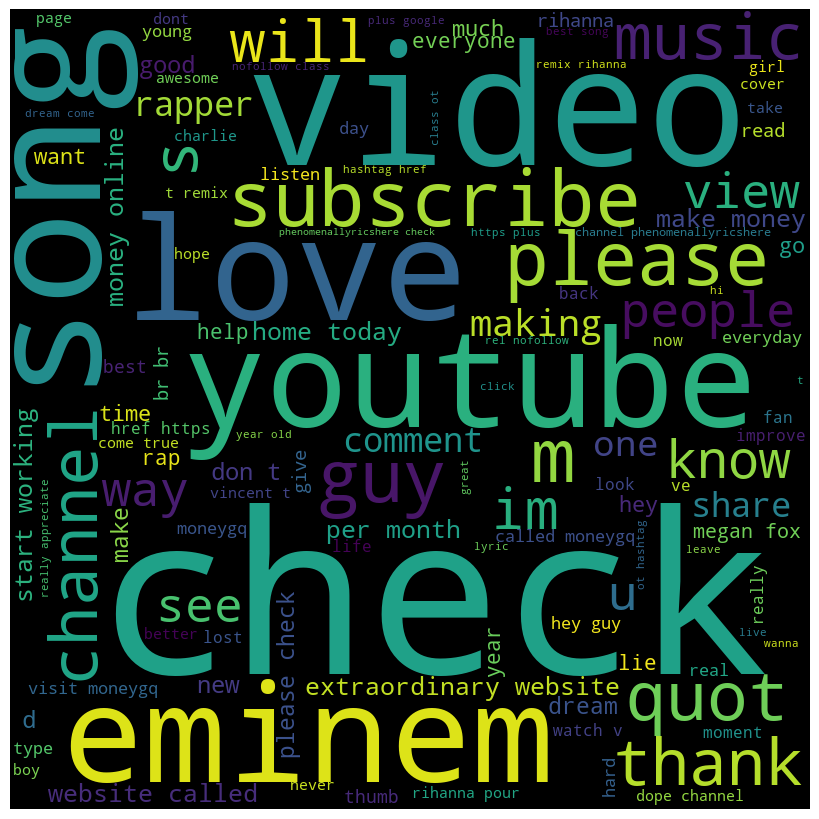

In [49]:
import matplotlib.pyplot as plt

comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file - only care about Cotent column
for val in word_data.CONTENT:
    # typecaste each val to string
    val = str(val)
    # split the value
    tokens = val.split()
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower() 
    comment_words += " ".join(tokens)+" "
 

wordcloud = WordCloud(width = 800, height = 800,
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [54]:
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

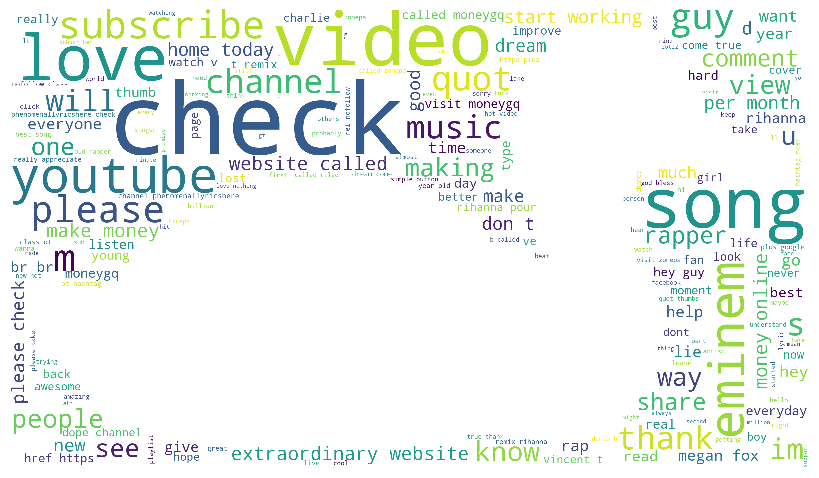

In [58]:
from PIL import Image
mask = np.array(Image.open(r"duck.png"))

wordcloud = WordCloud(stopwords = stopwords,
                      mask = mask, 
                      background_color = "white",
                      width = mask.shape[1],
                      height = mask.shape[0],
                      min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation = "None")
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()
    
    

# Customizing Visualizations

Customizations to Data Points:
* c = color
* alpha = transparency
* s = size
* label = "label"

Customizations to Graph:
* plt.xlabel()
* plt.ylabel()
* plt.title()
* plt.legend()
* plt.grid()

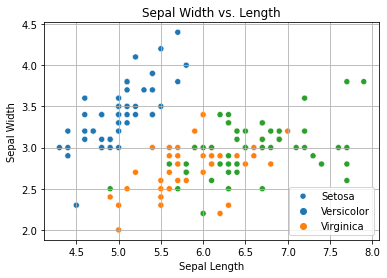

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example of Some of the Customizations 
sns.scatterplot( x="sepal_length", y="sepal_width", data=flower_data, hue='species', legend=True);
plt.legend(["Setosa", "Versicolor", "Virginica"], loc = "lower right")
plt.xlabel("Sepal Length");
plt.ylabel("Sepal Width");
plt.title("Sepal Width vs. Length");
plt.grid(True);

In [73]:
players = ['Derek N.', 'Usain Bolt', 'Daniel W.', 'Larry L.', 'Irene Z.']
speeds = [40.9, 37.6, 36.5, 35.6, 17.1]

speeds = [(i*1000)/3600 for i in speeds]

data = pd.DataFrame() 

for idx, each in enumerate(speeds): 
    newCol = np.arange(0, 100, each/10) 
    tempdata = pd.DataFrame({players[idx]: newCol}) 
    data = pd.concat([data, tempdata], ignore_index=False, axis=1)
    
data = data.fillna(100)
data.head()

Derek N.  Usain Bolt  Daniel W.  Larry L.  Irene Z.
0  0.000000    0.000000   0.000000  0.000000     0.000
1  1.136111    1.044444   1.013889  0.988889     0.475
2  2.272222    2.088889   2.027778  1.977778     0.950
3  3.408333    3.133333   3.041667  2.966667     1.425
4  4.544444    4.177778   4.055556  3.955556     1.900

MovieWriter imagemagick unavailable; using Pillow instead.


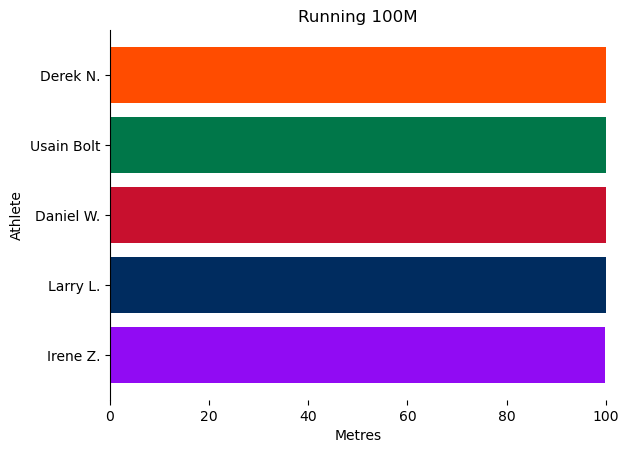

In [74]:
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
plt.xlim(0, 100)
plt.gca().invert_yaxis()

ax.set_xlabel('Metres')
ax.set_ylabel('Athlete')
ax.set_title("Running 100M")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

def init(): 
    plt.barh(players, data.iloc[0])
    
def animate(i): 
    plt.barh(players, data.iloc[i], color=['#FF4C00', '#007749', '#C8102E', '#002C5F', '#910BF3'])
    
anim = FuncAnimation(fig, animate, init_func=init, repeat=True, save_count=len(data))
anim.save('Run100M.gif', writer='imagemagick', fps=10, dpi=240)